 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [733]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [734]:
# Reading whale returns
whale_path = Path("Resources/whale_returns.csv")
whale_data = pd.read_csv(whale_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [735]:
# Count nulls
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [736]:
# Drop nulls
whale_data = whale_data.dropna()
whale_data.isnull().sum()
whale_data.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
2015-03-09                     0.005843               -0.001652

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [737]:
# Reading algorithmic returns
algo_path = Path("Resources/algo_returns.csv")
algo_data = pd.read_csv(algo_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [738]:
# Count nulls
algo_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [739]:
# Drop nulls
algo_data = algo_data.dropna()
algo_data.head()

Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [740]:
# Reading S&P 500 Closing Prices
sp500_path = Path("Resources/sp500_history.csv")
sp500_data = pd.read_csv(sp500_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_data.head()

Close
Date                
2019-04-23  $2933.68
2019-04-22  $2907.97
2019-04-18  $2905.03
2019-04-17  $2900.45
2019-04-16  $2907.06

In [741]:
# Check Data Types
sp500_data.dtypes

Close    object
dtype: object

In [742]:
# Fix Data Types                  
sp500_data["Close"]=(sp500_data["Close"].replace( '[\$,)]','', regex=True ).replace( '[(]','-',regex=True ).astype(float))
sp500_data.dtypes

Close    float64
dtype: object

In [743]:
# Calculate Daily Returns
daily_returns_sp500 = sp500_data["Close"].pct_change()
daily_returns_sp500.head()

Date
2019-04-23         NaN
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
Name: Close, dtype: float64

In [744]:
# Drop nulls
daily_returns_sp500 = daily_returns_sp500.dropna()
daily_returns_sp500.head()

Date
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
2019-04-15   -0.000509
Name: Close, dtype: float64

In [745]:
# Rename `Close` Column to be specific to this portfolio.
sp500_data["DailyReturnsSP500"] = daily_returns_sp500
sp500_data = sp500_data.dropna()
sp500_data.drop('Close', axis=1, inplace=True)
sp500_data.head()

DailyReturnsSP500
Date                         
2019-04-22          -0.008764
2019-04-18          -0.001011
2019-04-17          -0.001577
2019-04-16           0.002279
2019-04-15          -0.000509

## Combine Whale, Algorithmic, and S&P 500 Returns

In [746]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_returns = pd.concat([whale_data,algo_data,sp500_data], axis='columns', join='inner')
joined_returns

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-15                  -0.001422           -0.001156   
2019-04-16                   0.002699            0.000388   
2019-04-17                  -0.002897           -0.006467   
2019-04-18                   0.001448            0.001222   
2019-04-22                  -0.002586           -0.007333   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   
...                                 ...                     ...       ...   
2019-04-15                     0.000398               -0.010492 -0.004331   
2019-04-16                    -0.000831                0.000837 -0.006945   
2019-04-17                    -0.004409                0.003222 -0.010301   
2019-04-18                     0.000582                0.001916 -0.000588   
2019-04-22                    -0.003640               -0.001088  0.000677   

              Algo 2  DailyReturnsSP500  
Date                                     
2015-03-03 -0.000949           0.004408  
2015-03-04  0.002416          -0.001195  
2015-03-05  0.004323           0.014378  
2015-03-06 -0.011460          -0.003929  
2015-03-09  0.001303           0.017254  
...              ...                ...  
2019-04-15 -0.004572          -0.000509  
2019-04-16  0.002899           0.002279  
2019-04-17 -0.005228          -0.001577  
2019-04-18 -0.001229          -0.001011  
2019-04-22 -0.001936          -0.008764  

[1042 rows x 7 columns]

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

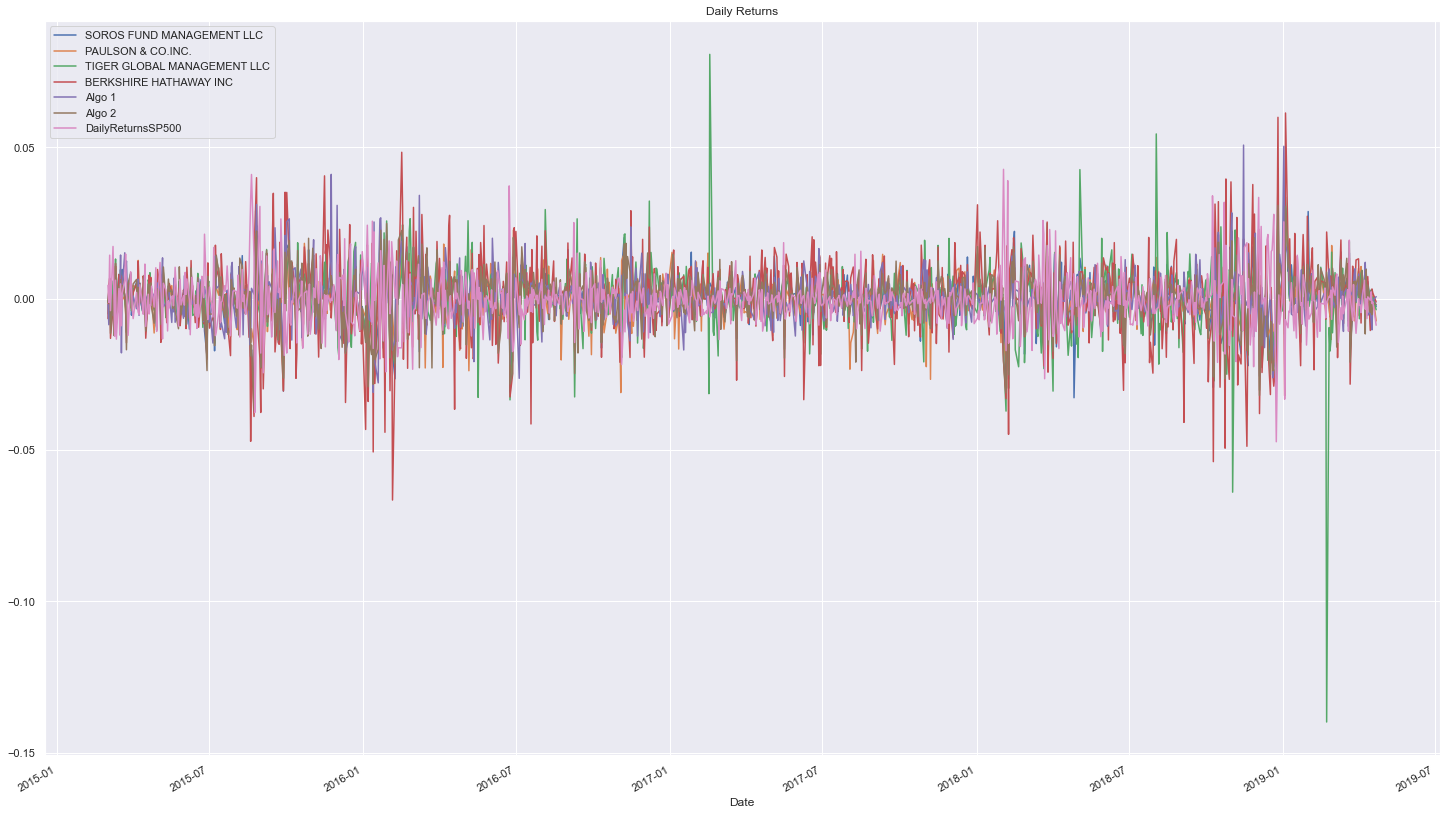

In [747]:
# Plot daily returns of all portfolios
joined_returns.plot(title='Daily Returns', figsize=(25,15))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

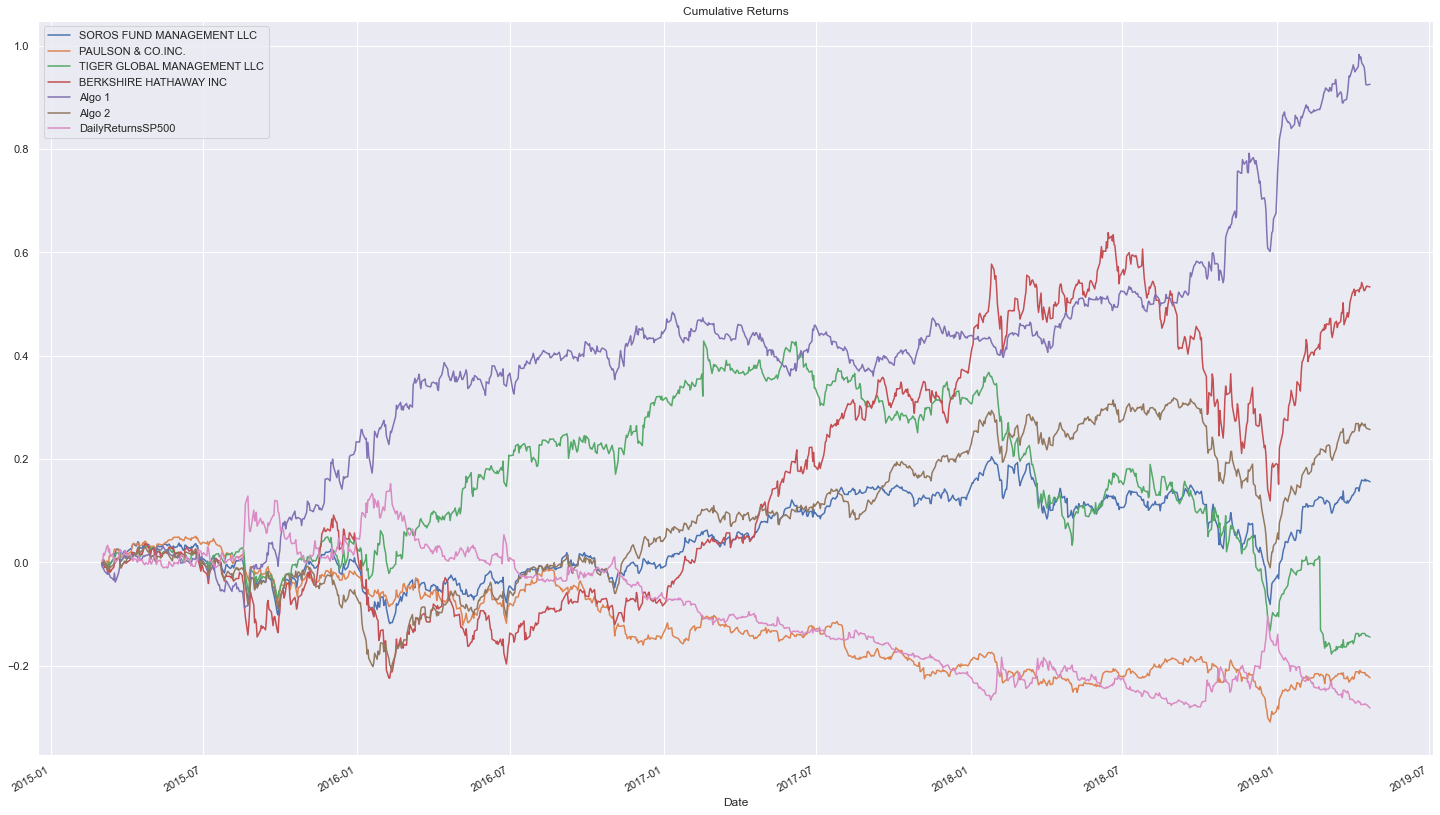

In [777]:
daily_cr = (1 + joined_returns).cumprod() - 1
daily_cr.plot(title='Cumulative Returns', figsize=(25,15))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

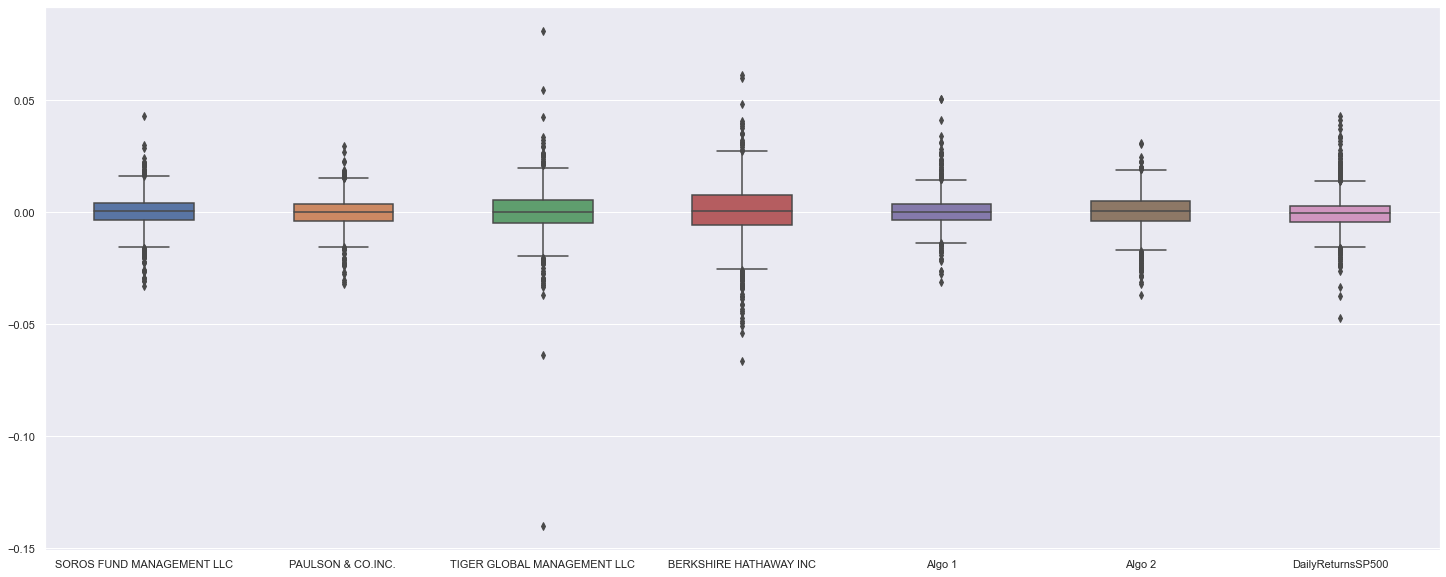

In [749]:
# Box plot to visually show risk
sns.set(rc={'figure.figsize':(25,10)})
sns.boxplot(data=joined_returns, width = 0.5)

### Calculate Standard Deviations

In [750]:
# Calculate the daily standard deviations of all portfolios
daily_std = np.std(joined_returns)
daily_std

SOROS FUND MANAGEMENT LLC      0.007892
PAULSON & CO.INC.              0.007022
TIGER GLOBAL MANAGEMENT LLC    0.010892
BERKSHIRE HATHAWAY INC         0.012913
Algo 1                         0.007619
Algo 2                         0.008337
DailyReturnsSP500              0.008583
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [751]:
# Calculate  the daily standard deviation of S&P 500
daily_std_sp500 = np.std(joined_returns["DailyReturnsSP500"])
daily_std_sp500
# Determine which portfolios are riskier than the S&P 500
for std in daily_std:
    if std >  daily_std_sp500:
        print(f'{std} is riskier')

0.01089207512610612 is riskier
0.012912552556415196 is riskier


### Calculate the Annualized Standard Deviation

In [752]:
# Calculate the annualized standard deviation (252 trading days)
std = daily_std * 252 ** 0.5
std

SOROS FUND MANAGEMENT LLC      0.125288
PAULSON & CO.INC.              0.111473
TIGER GLOBAL MANAGEMENT LLC    0.172906
BERKSHIRE HATHAWAY INC         0.204980
Algo 1                         0.120948
Algo 2                         0.132349
DailyReturnsSP500              0.136247
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

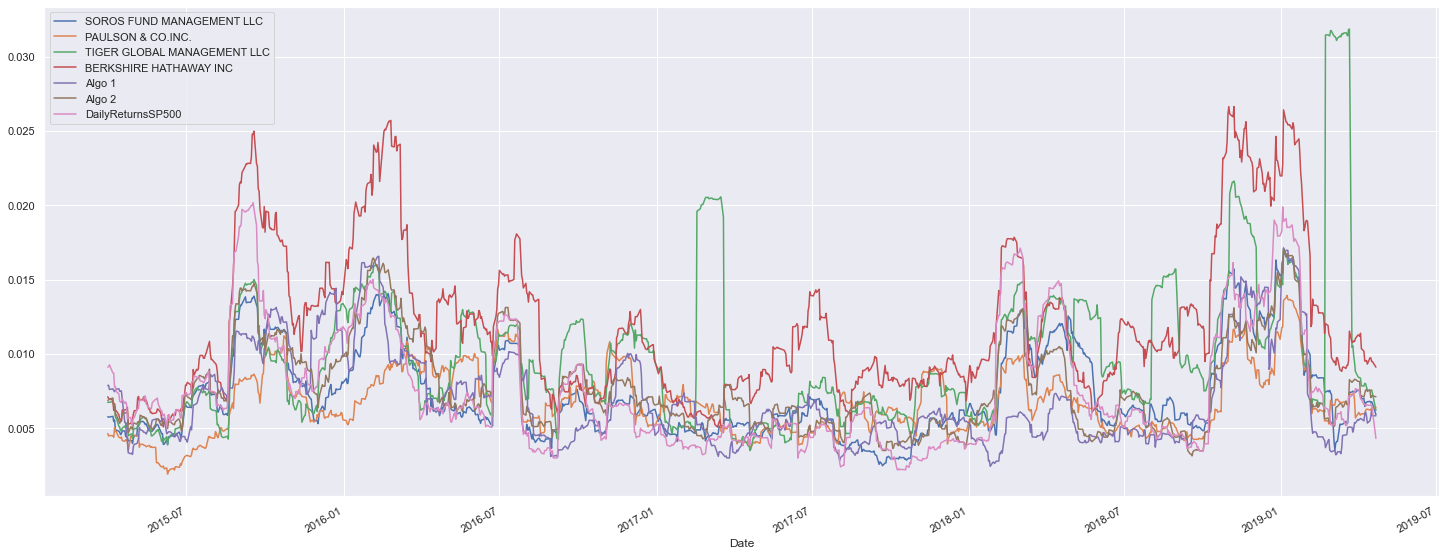

In [753]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = joined_returns.rolling(21).std()
rolling_std
# Plot the rolling standard deviation
rolling_std.plot()

### Calculate and plot the correlation

<AxesSubplot:>

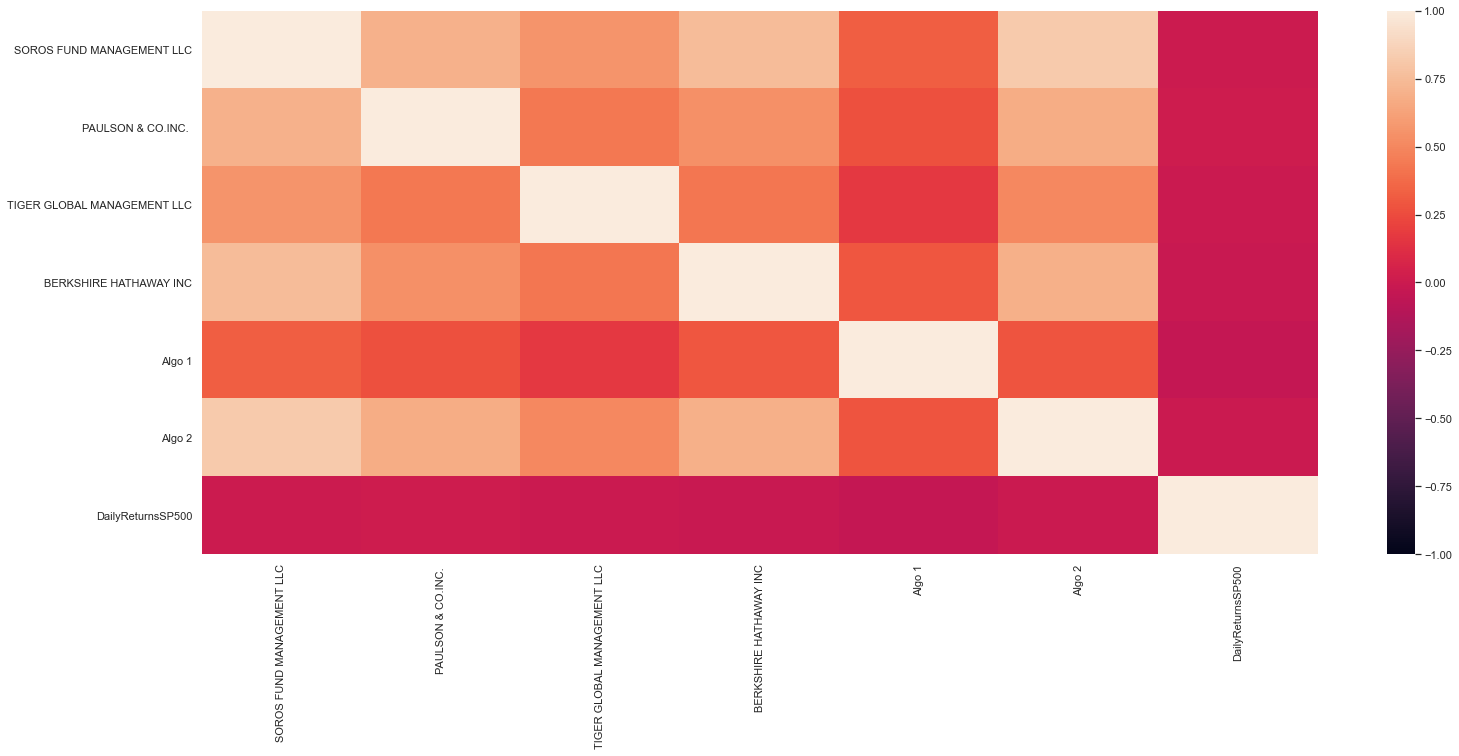

In [754]:
# Calculate the correlation
correlation = joined_returns.corr()
correlation
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [755]:
# Calculate covariance of a single portfolio
covariance = joined_returns["BERKSHIRE HATHAWAY INC"].cov(joined_returns["BERKSHIRE HATHAWAY INC"])
print(covariance)
# Calculate variance of S&P 500
variance = joined_returns["DailyReturnsSP500"].var()
print(variance)
# Computing beta
beta = covariance / variance
print(beta)
# Plot beta trend
# beta.plot()

0.0001668941806821484
7.373467552840441e-05
2.263442260864858


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [756]:
# Use `ewm` to calculate the rolling window
ewm_21 = joined_returns.ewm(halflife=21).mean()
ewm_21

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.000511           -0.000802   
2015-03-05                   0.001718            0.000878   
2015-03-06                  -0.000808           -0.000291   
2015-03-09                  -0.000511            0.000673   
...                               ...                 ...   
2019-04-15                   0.001439            0.000450   
2019-04-16                   0.001480            0.000448   
2019-04-17                   0.001338            0.000223   
2019-04-18                   0.001341            0.000256   
2019-04-22                   0.001214            0.000009   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.001532               -0.001089 -0.005320   
2015-03-05                    -0.000193                0.001603 -0.003817   
2015-03-06                    -0.002369               -0.002256 -0.004116   
2015-03-09                    -0.000616               -0.002128 -0.004400   
...                                 ...                     ...       ...   
2019-04-15                    -0.000813                0.001896  0.001175   
2019-04-16                    -0.000813                0.001862  0.000912   
2019-04-17                    -0.000930                0.001906  0.000548   
2019-04-18                    -0.000881                0.001907  0.000511   
2019-04-22                    -0.000971                0.001809  0.000516   

              Algo 2  DailyReturnsSP500  
Date                                     
2015-03-03 -0.000949           0.004408  
2015-03-04  0.000761           0.001560  
2015-03-05  0.001988           0.005975  
2015-03-06 -0.001542           0.003375  
2015-03-09 -0.000935           0.006337  
...              ...                ...  
2019-04-15  0.001313          -0.001290  
2019-04-16  0.001364          -0.001174  
2019-04-17  0.001150          -0.001187  
2019-04-18  0.001073          -0.001182  
2019-04-22  0.000975          -0.001428  

[1042 rows x 7 columns]

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [757]:
# Annualized Sharpe Ratios
sharpe_ratios = joined_returns.mean() / joined_returns.std()
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.021600
PAULSON & CO.INC.             -0.030957
TIGER GLOBAL MANAGEMENT LLC   -0.008201
BERKSHIRE HATHAWAY INC         0.038221
Algo 1                         0.086276
Algo 2                         0.030510
DailyReturnsSP500             -0.032668
dtype: float64

<AxesSubplot:>

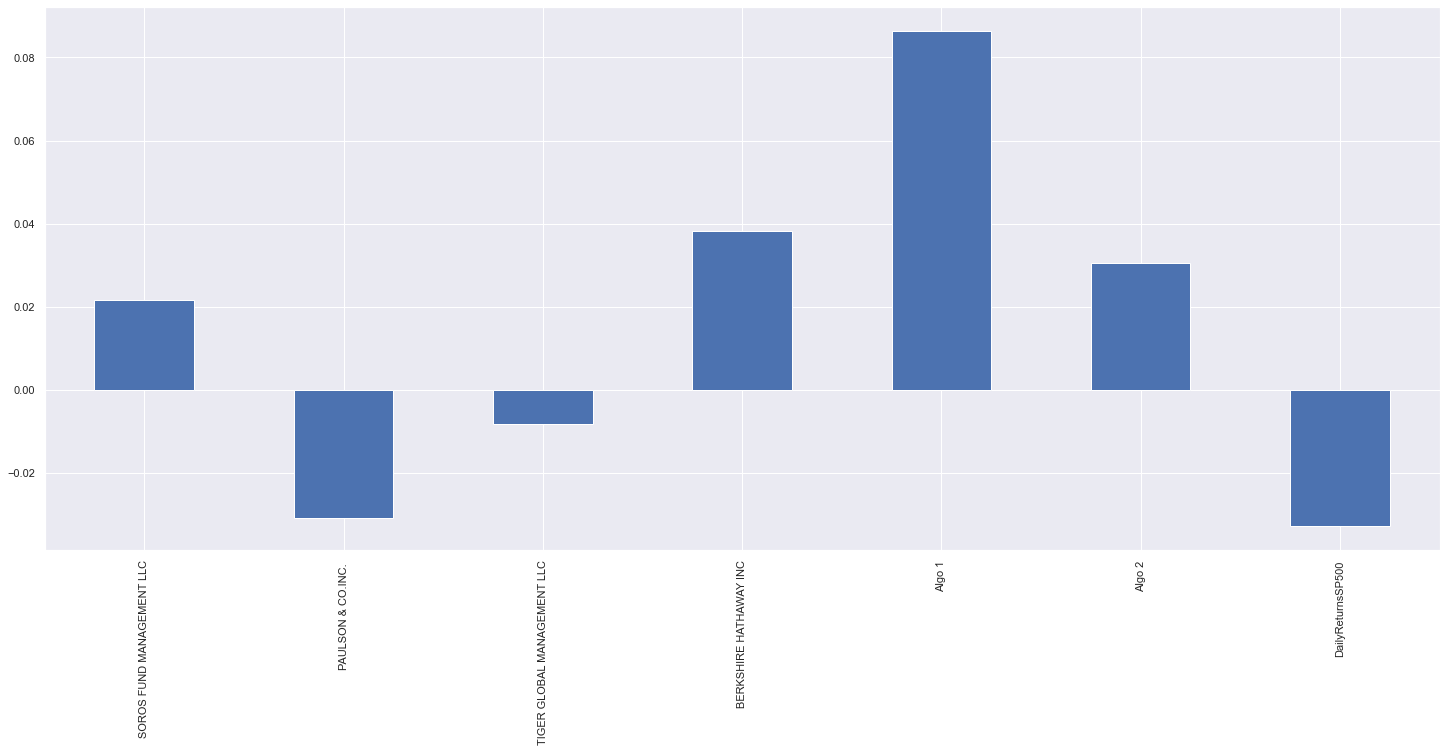

In [758]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [759]:
# Reading data from 1st stock
goog_path = Path("Resources/goog_historical.csv")
goog_data = pd.read_csv(goog_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
goog_data["GOOG"] = goog_data["NOCP"]
goog_data = goog_data.dropna()
goog_data.drop('NOCP', axis=1, inplace=True)
goog_data.drop('Symbol', axis=1, inplace=True)
goog_data.head()

GOOG
Trade DATE         
2019-05-09  1162.38
2019-05-08  1166.27
2019-05-07  1174.10
2019-05-06  1189.39
2019-05-03  1185.40

In [760]:
# Reading data from 2nd stock
aapl_path = Path("Resources/aapl_historical.csv")
aapl_data = pd.read_csv(aapl_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
aapl_data["AAPL"] = aapl_data["NOCP"]
aapl_data = aapl_data.dropna()
aapl_data.drop('NOCP', axis=1, inplace=True)
aapl_data.drop('Symbol', axis=1, inplace=True)
aapl_data.head()

AAPL
Trade DATE        
2019-05-09  200.72
2019-05-08  202.90
2019-05-07  202.86
2019-05-06  208.48
2019-05-03  211.75

In [761]:
# Reading data from 3rd stock
cost_path = Path("Resources/cost_historical.csv")
cost_data = pd.read_csv(cost_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
cost_data["COST"] = cost_data["NOCP"]
cost_data = cost_data.dropna()
cost_data.drop('NOCP', axis=1, inplace=True)
cost_data.drop('Symbol', axis=1, inplace=True)
cost_data.head()

COST
Trade DATE        
2019-05-09  243.47
2019-05-08  241.34
2019-05-07  240.18
2019-05-06  244.23
2019-05-03  244.62

In [762]:
# Combine all stocks in a single DataFrame
joined_stocks = pd.concat([goog_data,aapl_data,cost_data], axis='columns', join='inner')
joined_stocks.head()

GOOG    AAPL    COST
Trade DATE                         
2019-05-09  1162.38  200.72  243.47
2019-05-08  1166.27  202.90  241.34
2019-05-07  1174.10  202.86  240.18
2019-05-06  1189.39  208.48  244.23
2019-05-03  1185.40  211.75  244.62

In [763]:
# Reset Date index
# Done Already

In [764]:
# Reorganize portfolio data by having a column per symbol
# Done Already

In [765]:
# Calculate daily returns
joined_stocks = joined_stocks.pct_change()
joined_stocks.head()
# Drop NAs
joined_stocks = joined_stocks.dropna()
# Display sample data
joined_stocks.head()

GOOG      AAPL      COST
Trade DATE                              
2019-05-08  0.003347  0.010861 -0.008749
2019-05-07  0.006714 -0.000197 -0.004806
2019-05-06  0.013023  0.027704  0.016862
2019-05-03 -0.003355  0.015685  0.001597
2019-05-02 -0.019226 -0.012279 -0.007890

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [766]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
weighted_returns = (weights * joined_stocks)
# Display sample data
weighted_returns.head()

GOOG      AAPL      COST
Trade DATE                              
2019-05-08  0.001116  0.003620 -0.002916
2019-05-07  0.002238 -0.000066 -0.001602
2019-05-06  0.004341  0.009235  0.005621
2019-05-03 -0.001118  0.005228  0.000532
2019-05-02 -0.006409 -0.004093 -0.002630

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [767]:
# Join your returns DataFrame to the original returns DataFrame
joined_returns_port = pd.concat([joined_stocks,weighted_returns], axis='columns', join='inner')

In [768]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_returns_port = joined_returns_port.dropna()
joined_returns_port.head()

GOOG      AAPL      COST      GOOG      AAPL      COST
Trade DATE                                                            
2019-05-08  0.003347  0.010861 -0.008749  0.001116  0.003620 -0.002916
2019-05-07  0.006714 -0.000197 -0.004806  0.002238 -0.000066 -0.001602
2019-05-06  0.013023  0.027704  0.016862  0.004341  0.009235  0.005621
2019-05-03 -0.003355  0.015685  0.001597 -0.001118  0.005228  0.000532
2019-05-02 -0.019226 -0.012279 -0.007890 -0.006409 -0.004093 -0.002630

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [776]:
# Calculate the annualized `std`
daily_std_port = np.std(joined_returns_port)
std_port = daily_std_port * 252 ** 0.5
std_port

GOOG    0.264789
AAPL    0.299783
COST    0.212915
GOOG    0.088263
AAPL    0.099928
COST    0.070972
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [770]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [771]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [772]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [773]:
# Calculate Annualzied Sharpe Ratios


In [774]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!